In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read me
# https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d
# https://towardsdatascience.com/the-intuition-behind-gradient-boosting-xgboost-6d5eac844920

# Gradient Boosting

### Gradient Boosting from Scratch

In [3]:
from sklearn.tree import DecisionTreeRegressor

### Example 1: A sequence of Decision Trees

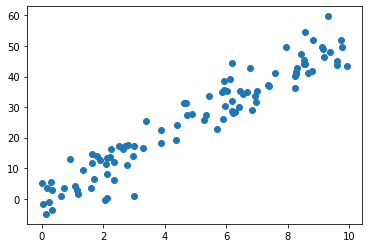

In [4]:
# A 1D regression with decision tree
m = 100
x = np.random.uniform(0,10,m)
y = 5*x + 1 + 5*np.random.randn(m)
#y[::5] += 40 * (0.5 - np.random.rand(20)) # add outliers
x = x.reshape(m,1)
plt.scatter(x,y)

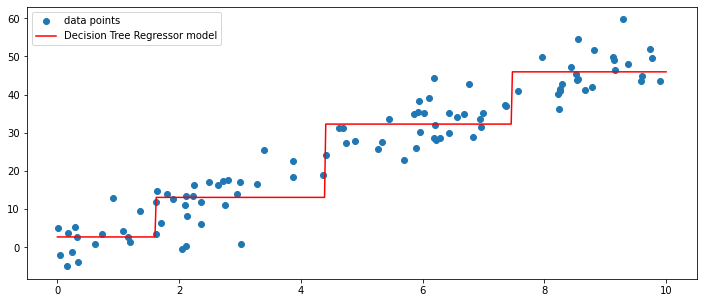

In [5]:
# decision tree 1
reg_tree1 = DecisionTreeRegressor(max_depth=2)
reg_tree1.fit(x,y)

# plot data
plt.figure(figsize=(12,5))
plt.scatter(x,y,label='data points')

# plot model
x_plot = np.linspace(0,10,500).reshape(500,1)
y_plot = reg_tree1.predict(x_plot)
plt.plot(x_plot,y_plot, c='red',label='Decision Tree Regressor model')

plt.legend()

Text(0.5, 1.0, 'residuals')

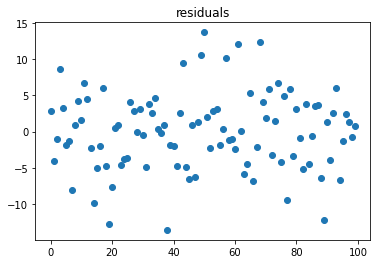

In [6]:
# predictions
y1_pred = reg_tree1.predict(x)
# compute the residuals/errors (difference between actual and predicted values)
y2 = y - y1_pred
plt.plot(y2,'o')
plt.title('residuals')

In [7]:
# Fit a new tree on the residuals
reg_tree2 = DecisionTreeRegressor(max_depth=1)
reg_tree2.fit(x,y2)

DecisionTreeRegressor(max_depth=1)

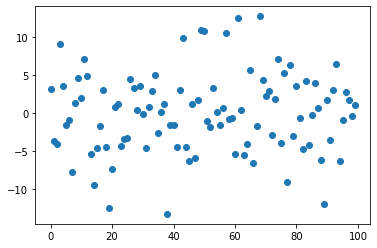

In [8]:
# compute new residuals
y2_pred = reg_tree2.predict(x)
y3 = y2-y2_pred
plt.plot(y3,'o')

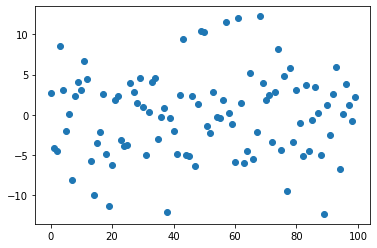

In [9]:
# repeat
reg_tree3 = DecisionTreeRegressor(max_depth=1)
reg_tree3.fit(x,y3)
# compute new residuals
y3_pred = reg_tree3.predict(x)
y4 = y3-y3_pred
plt.plot(y4,'o')

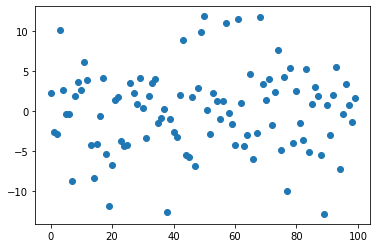

In [10]:
reg_tree4 = DecisionTreeRegressor(max_depth=1)
reg_tree4.fit(x,y4)
# compute new residuals
y4_pred = reg_tree4.predict(x)
y5 = y4-y4_pred
plt.plot(y5,'o')

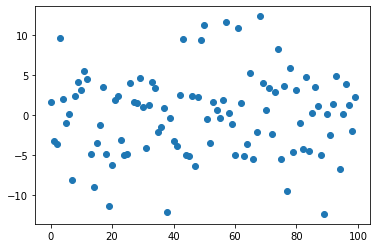

In [11]:
reg_tree5 = DecisionTreeRegressor(max_depth=1)
reg_tree5.fit(x,y5)
# compute new residuals
y5_pred = reg_tree5.predict(x)
y6 = y5-y5_pred
plt.plot(y6,'o')

In [12]:
# predictions
y_pred = y1_pred + y2_pred + y3_pred + y4_pred + y5_pred

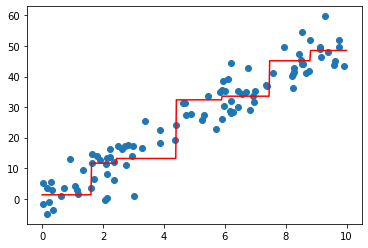

In [13]:
# plot gradient boosting model
y1_plot = reg_tree1.predict(x_plot)
y2_plot = reg_tree2.predict(x_plot)
y3_plot = reg_tree3.predict(x_plot)
y4_plot = reg_tree4.predict(x_plot)
y5_plot = reg_tree5.predict(x_plot)
y_plot = y1_plot + y2_plot + y3_plot + y4_plot + y5_plot

plt.scatter(x,y)
plt.plot(x_plot,y_plot,'r')

## Another example

In [14]:
from sklearn.linear_model import LinearRegression

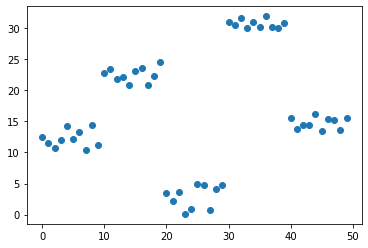

In [15]:
x = np.arange(0,50)

y1 = np.random.uniform(10,15,10) # samples from the uniform distribution on [10,15]
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
r = y.copy()
x = x.reshape(50,1)
plt.scatter(x,y)

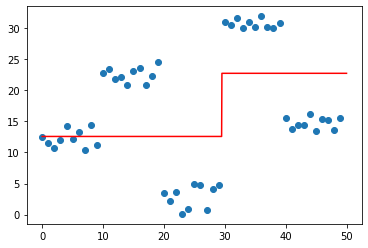

In [16]:
# initial tree
tree_reg = DecisionTreeRegressor(max_depth=1)
tree_reg.fit(x,y)
# prediction
y_pred = tree_reg.predict(x)

# plot initial tree
x_plot = np.linspace(0,50,1000).reshape(1000,1)
y_plot = tree_reg.predict(x_plot)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,color='red')

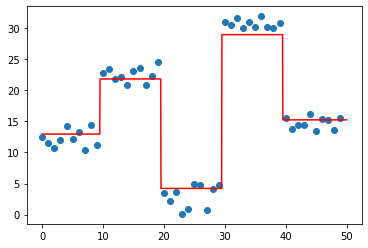

In [29]:
# residuals
r = r-tree_reg.predict(x)
# next model
tree_reg = DecisionTreeRegressor(max_depth=1)
# fit tree on residuals of previous model
tree_reg.fit(x,r) 

# add predictions to our "final" prediction
y_pred += tree_reg.predict(x)
y_plot += tree_reg.predict(x_plot)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,color='red')

## Building a gradient boosting model in scikit-learn

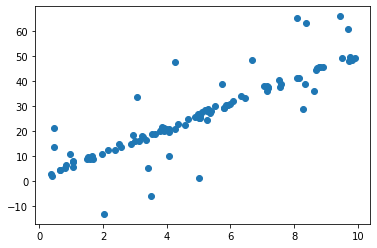

In [30]:
# A 1D regression with decision tree
m = 100
x = np.random.uniform(0,10,m)
y = 5*x + 1 + 1*np.random.randn(m)
y[::5] += 50 * (0.5 - np.random.rand(20)) # add outliers
x = x.reshape(m,1)
plt.scatter(x,y)

Boosting models are quick to overfit the training data

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

**rule of thumb:** as n_estimators, the number of trees, goes up, learning_rate should go down.

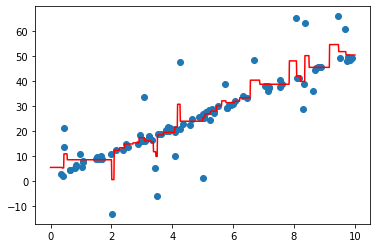

In [38]:
# learning rate < 1 slows down the convergence to zero residuals (it prevents overfitting)
gb_reg = GradientBoostingRegressor(n_estimators=50, #number of trees
                                   max_depth=2,
                                   learning_rate=0.1)
gb_reg.fit(x,y)
y_plot = gb_reg.predict(x_plot)
plt.scatter(x,y)
x_plot = np.linspace(0,10,1000).reshape(1000,1)
y_plot = gb_reg.predict(x_plot)
plt.plot(x_plot,y_plot,color='red')